### Import libraries and reading the data

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Reading the data
data = pd.read_csv('IRIS.csv')
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Preprocessing

In [ ]:
# Cheaking Null values
data.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
# Taking information from the data
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Cheaking the 3 classes of species column
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])

# Change objects to numbers
# Iris-setosa = 0
# Iris-versicolor = 1
# Iris-virginica = 2

<Axes: >

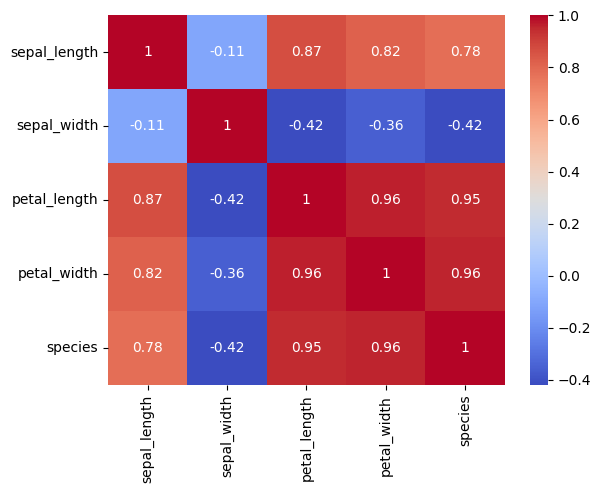

In [ ]:
# Heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

### Take X features and Y label


In [ ]:
# Features, Y label
x = data.drop('species', axis=1)
y = data['species']

### Split the train and test

In [ ]:
# Split to train, test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

### Training

In [ ]:
# Train the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

### Testing

In [ ]:
# Test the model
y_pred = model.predict(x_test)

### Metrics

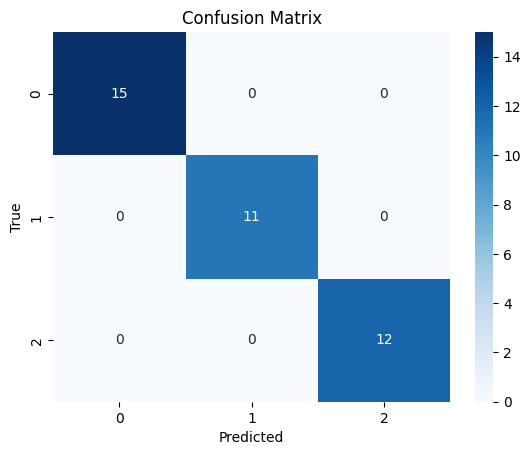

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report
import matplotlib.pyplot as plt


conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Print classification report and accuracy
print(classification_report(y_test,y_pred))
print("Accuracy:",(accuracy_score(y_test,y_pred)*100),"%")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Accuracy: 100.0 %


### Using the model

In [ ]:
# Using the model
sample_data = pd.DataFrame({
    'sepal_length': [5.1],
    'sepal_width': [3.5],
    'petal_length': [1.4],
    'petal_width': [0.2] })

sample_prediction = model.predict(sample_data)

print("Predicted Species:", (sample_prediction)[0])
# Iris-setosa = 0
# Iris-versicolor = 1
# Iris-virginica = 2

Predicted Species: 0
